In [ ]:
Circle Packing Chart with Multi-Level Hierarchy

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import json

In [ ]:
with open('myPadletData.csv') as json_file:
    Data = json.load(json_file)

In [ ]:
Data = [Data]
Data

[{'id': 'Words_in_City',
  'datum': 1358.0,
  'children': [{'id': '(47.3946',
    'datum': 34.0,
    'children': [{'id': 'Mi', 'datum': 5.0},
     {'id': 'Home', 'datum': 2.0},
     {'id': 'most', 'datum': 2.0},
     {'id': 'always', 'datum': 1.0},
     {'id': 'brings', 'datum': 1.0},
     {'id': 'sense', 'datum': 1.0}]},
   {'id': '(47.396',
    'datum': 33.0,
    'children': [{'id': 'Mi', 'datum': 2.0},
     {'id': 'sea', 'datum': 2.0},
     {'id': 'enjoys', 'datum': 1.0},
     {'id': 'silence', 'datum': 1.0},
     {'id': 'peace', 'datum': 1.0},
     {'id': 'nature', 'datum': 1.0}]},
   {'id': '(47.651672',
    'datum': 22.0,
    'children': [{'id': 'Ben', 'datum': 2.0},
     {'id': 'by', 'datum': 2.0},
     {'id': 'balloon', 'datum': 1.0},
     {'id': 'happy', 'datum': 1.0},
     {'id': 'visiting', 'datum': 1.0},
     {'id': 'Sakuma', 'datum': 1.0}]},
   {'id': '(47.65414903333652',
    'datum': 0.0,
    'children': [{'id': '', 'datum': 1.0}]},
   {'id': '(47.656188',
    'datum': 2

# Circle Packing Chart with Multi-Level Hierarchy

source: https://www.python-graph-gallery.com/circular-packing-several-levels-of-hierarchy

This post explains how to build a circle packing chart with several levels of hierarchy. It uses the circlize library to compute the bubble position, and matplotlib for the rendering.

In [ ]:
pip install circlify 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# import the circlify library
import circlify

# Compute circle positions thanks to the circlify() function
circles = circlify.circlify(
    Data, 
    show_enclosure=False, 
    target_enclosure=circlify.Circle(x=0, y=0, r=1)
)

min to max ratio is too low at 0.000000 and it could cause algorithm stability issues. Try to remove insignificant data


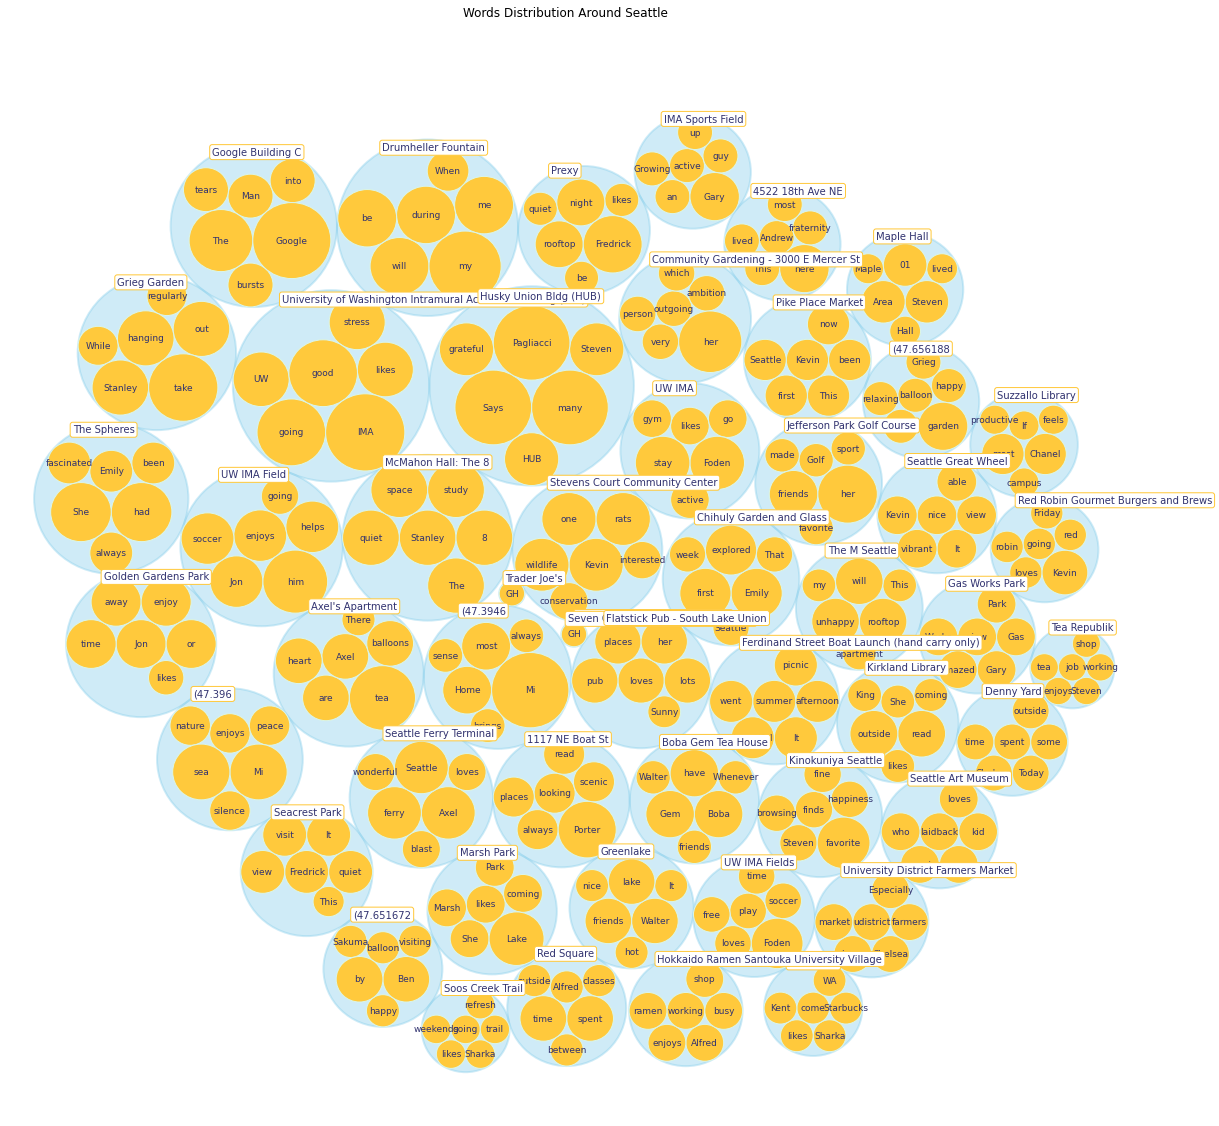

In [ ]:
# import libraries
import circlify
import matplotlib.pyplot as plt
import matplotlib as mpl

# Create just a figure and only one subplot
fig, ax = plt.subplots(figsize=(20,20))

# Title
ax.set_title('Words Distribution Around Seattle', pad =15)

# Remove axes
ax.axis('off')

# Find axis boundaries
lim = max(
    max(
        abs(circle.x) + circle.r,
        abs(circle.y) + circle.r,
    )
    for circle in circles
)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)
# Print circle the highest level (continents):
for circle in circles:
    if circle.level != 2:
      continue
    x, y, r = circle
    ax.add_patch( plt.Circle((x, y), r, alpha=0.4, linewidth=2, color= '#87CEEB'))
# Print circle and labels for the highest level:
for circle in circles:
    if circle.level != 3:
      continue
    x, y, r = circle
    label = circle.ex["id"]
    ax.add_patch( plt.Circle((x, y), r, alpha=1, linewidth=1, facecolor='#FFC93C', edgecolor='#DBF6E9'))
    txt = plt.text(x, y, label, fontsize=9, color="#31326F", ha='center', va='center', wrap=True)
    txt._get_wrap_line_width = lambda : 70

# Print labels for the continents
for circle in circles:
    if circle.level != 2:
      continue
    x, y, r = circle
    label = circle.ex["id"]
    plt.annotate(label, (x-r/2,y+0.85*r) ,va='bottom', ha='left', color="#31326F", bbox=dict(facecolor='white', edgecolor='#FFC93C', boxstyle='round', pad=.25))